Determination of partial contributions of hadrons
-------------------------------------------------

This notebook reproduces Figure 9 from the proceedings arXiv:1503.00544.  

In [1]:
#basic imports and ipython setup
%load_ext autoreload
%matplotlib inline
%autoreload 2
import os
import matplotlib.pyplot as plt
import numpy as np
os.chdir('..')

import warnings
warnings.filterwarnings('ignore')


#import solver related modules
from MCEq.core import MCEqRun
from mceq_config import config
#import primary model choices
import CRFluxModels.CRFluxModels as pm

Initialize MCeq class
---------------------

In [2]:
mceq_run = MCEqRun(
#provide the string of the interaction model
interaction_model='SIBYLL2.3',
#primary cosmic ray flux model
#support a tuple (primary model class (not instance!), arguments)
primary_model=(pm.CombinedGHandHG, "H3a"),#(pm.Thunman, None),
# Zenith angle in degrees. 0=vertical, 90=horizontal
theta_deg=0.0,
na49_model=None,
#expand the rest of the options from mceq_config.py
**config
)

InteractionYields::_load(): Looking for /Users/mhuber/AtmosphericMuons_Anatoli/MCEq/data/SIBYLL23_yields_compact_ledpm.bz2
DecayYields:_load():: Loading file /Users/mhuber/AtmosphericMuons_Anatoli/MCEq/data/decays_v1_compact.ppd

Hadrons and stable particles:

"p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-", "K+", "Lambda0", "Lambda0-bar", "K0S", 
"D+", "D-", "Ds+", "Ds-", "D0", "D0-bar"

Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "antinutau", "antinumu", "antinue", "e+", 
"mu-", "mu+"

Aliases:
"obs_numu", "obs_nutau", "gamma", "pr_antinutau", "pr_antinumu", "pr_antinue", "obs_antinue", "k_nue", 
"k_numu", "k_nutau", "pi_antinutau", "pi_antinue", "pi_antinumu", "pi_nue", "pi_numu", "pi_nutau", 
"k_antinutau", "k_antinumu", "k_antinue", "obs_nue", "pr_nue", "pr_numu", "pr_nutau", "obs_antinutau", 
"obs_antinumu", "k_mu-", "obs_mu-", "pr_mu+", "pi_mu+", "pi_mu-", "k_mu+", "pr_mu-", 
"obs_mu+"

Total number of species: 61
MCEqRun::set_interaction_model():  SIBYL

In [3]:
res_groups = [
    (["D+", "D-", "D0", "D0-bar", "D*+", "D*-", "D*0", "D*0-bar"], r"$D^\pm + D^0$"),
    (["Ds+", "Ds-"], r"$D_s$"),
    (["K0S"], r"$K^0_s$"),
    (["K0L"], r"$K^0_L$"),
    (["LambdaC+", "LambdaC+-bar"], r'$\Lambda_C$'),
    (["OmegaC0", "OmegaC0-bar", "XiC+", 
      "XiC+-bar", "XiC0", "XiC0-bar", 
      "SigmaC*+", "SigmaC*++", "tau+", "tau-", 
      "SigmaC*++-bar", "SigmaC*+-bar", "SigmaC*0", 
      "SigmaC*0-bar", "SigmaC+", "SigmaC++", 
      "SigmaC++-bar", "SigmaC+-bar", "SigmaC0", 
      "SigmaC0-bar"], r"other prompt"),
    (["K0S", "K0L", "n", "n-bar", "p", "p-bar", 
      "Lambda0", "Lambda0-bar", "Sigma-", 
      "Sigma--bar", "Xi-", "Xi--bar", "Xi0", 
      "Xi0-bar", "Delta-", "Delta--bar", "Delta0", 
      "Delta0-bar", "K*+", "K*-", "K*0", "K*0-bar", 
      "Omega-", "Omega--bar", "Sigma*+", "Sigma*+-bar", 
      "Sigma*-", "Sigma*--bar", "Sigma*0", "Sigma*0-bar", 
      "Sigma+", "Sigma+-bar", "Sigma0", "Sigma0-bar", 
      "Delta+", "Delta++", "Delta++-bar", "Delta+-bar", 
      "Xi*-", "Xi*--bar", "Xi*0", "Xi*0-bar"],r"other conv. mu"),
    (["K0S", "K0L", "n", "n-bar", "p", "p-bar", 
      "Lambda0", "Lambda0-bar", "Sigma-", "Sigma--bar", 
      "Xi-", "Xi--bar", "Xi0", "Xi0-bar", "Delta-", 
      "Delta--bar", "Delta0", "Delta0-bar", "K*+", 
      "K*-", "K*0", "K*0-bar", "Omega-", "Omega--bar", 
      "Sigma*+", "Sigma*+-bar", "Sigma*-", "Sigma*--bar", 
      "Sigma*0", "Sigma*0-bar", "Sigma+", "Sigma+-bar", 
      "Sigma0", "Sigma0-bar", "Delta+", "Delta++", 
      "Delta++-bar", "Delta+-bar", "Xi*-", "Xi*--bar", 
      "Xi*0", "Xi*0-bar", "eta", "eta*", "omega", 
      "phi", "pi0", "rho+", "rho-", "rho0"],r"other conv. numu"),
    (["n", "n-bar", "p", "p-bar", "Lambda0", 
      "Lambda0-bar", "Sigma-", "Sigma--bar", 
      "Xi-", "Xi--bar", "Xi0", "Xi0-bar", "Delta-", 
      "Delta--bar", "Delta0", "Delta0-bar", 
      "K*+", "K*-", "K*0", "K*0-bar", "Omega-", 
      "Omega--bar", "Sigma*+", "Sigma*+-bar", "Sigma*-", 
      "Sigma*--bar", "Sigma*0", "Sigma*0-bar", "Sigma+", 
      "Sigma+-bar", "Sigma0", "Sigma0-bar", "Delta+", 
      "Delta++", "Delta++-bar", "Delta+-bar", "Xi*-", 
      "Xi*--bar", "Xi*0", "Xi*0-bar", "eta", "eta*", 
      "omega", "phi", "pi0", "rho+", "rho-", "rho0"],r"other conv. nue"),
    (["eta", "eta*", "omega", "phi", 
      "pi0", "rho+", "rho-", "rho0",
      "etaC", "jpsi"], r"unflavored"),
    (["tau+","tau-"], r"tau decay"),
    (["mu+", "mu-", "pi_mu+", "pi_mu-", 
      "k_mu+", "k_mu-", "pr_mu+", "pr_mu-"], r"$\mu$ decay")]

color_spectrum = ['b', 'r', 'g', 'orange', 'cyan', 'violet',
                  'brown', 'pink', 'yellow', 'lightblue']

Calculate and save results for Sibyll and NA49 model
-------------------------------------------

In [4]:
mag = 3
mu_obs = {}
numu_obs = {}
nue_obs = {}
nutau_obs = {}

#conventional
mu_conv = dict()
numu_conv = dict()
nue_conv = dict()    
#promt fluxes
mu_prompt = dict()
numu_prompt = dict()
nue_prompt = dict()     
#total fluxes
mu_total = dict()
numu_total = dict()
nue_total = dict()
nutau_total = dict()
#flux from pions
mu_pi = dict()
numu_pi =dict()
nue_pi = dict()    
#flux from kaons
mu_k = dict()
numu_k = dict()
nue_k = dict()


models = [(None,'Sibyll2.3'),('pC','SHIN')]
for mod,key in models:
    print('################################')
    print('Calculate {0:s} results'.format(key))
    print('################################')
    mceq_run.set_interaction_model('SIBYLL2.3',na49_model=mod,force=True)
    mu_i = dict()
    numu_i = dict()
    nue_i = dict()
    nutau_i = dict()
    for res_group, res_title in res_groups:
        mceq_run.set_obs_particles(res_group)
        mceq_run.solve()
        mu_i[res_title] = mceq_run.get_solution('obs_mu+', mag) + \
                        mceq_run.get_solution('obs_mu-', mag)
        numu_i[res_title] = mceq_run.get_solution('obs_numu', mag) + \
                          mceq_run.get_solution('obs_antinumu', mag)
        nue_i[res_title] = mceq_run.get_solution('obs_nue', mag) + \
                         mceq_run.get_solution('obs_antinue', mag)
        nutau_i[res_title] = mceq_run.get_solution('obs_nutau', mag) + \
                           mceq_run.get_solution('obs_antinutau', mag)
            
    mu_obs[key] = mu_i
    numu_obs[key] = numu_i
    nue_obs[key] = nue_i
    nutau_obs[key] = nutau_i
    
    #also save all further fluxes
    #conventional fluxes
    mu_conv[key] = mceq_run.get_solution('conv_mu+', mag) + \
          mceq_run.get_solution('conv_mu-', mag)

    numu_conv[key] = mceq_run.get_solution('conv_numu', mag) + \
            mceq_run.get_solution('conv_antinumu', mag)

    nue_conv[key] = mceq_run.get_solution('conv_nue', mag) + \
           mceq_run.get_solution('conv_antinue', mag)
    
    #promt fluxes
    mu_prompt[key] = mceq_run.get_solution('pr_mu+', mag) + \
          mceq_run.get_solution('pr_mu-', mag)

    numu_prompt[key] = mceq_run.get_solution('pr_numu', mag) + \
            mceq_run.get_solution('pr_antinumu', mag)

    nue_prompt[key] = mceq_run.get_solution('pr_nue', mag) + \
           mceq_run.get_solution('pr_antinue', mag)
    
    #total fluxes
    mu_total[key] = mceq_run.get_solution('total_mu+', mag) + \
           mceq_run.get_solution('total_mu-', mag)

    numu_total[key] = mceq_run.get_solution('total_numu', mag) + \
            mceq_run.get_solution('total_antinumu', mag)

    nue_total[key] = mceq_run.get_solution('total_nue', mag) + \
            mceq_run.get_solution('total_antinue', mag)

    nutau_total[key] = mceq_run.get_solution('total_nutau', mag) + \
              mceq_run.get_solution('total_antinutau', mag)
    
    #flux from pions
    mu_pi[key] = mceq_run.get_solution('pi_mu+', mag) + \
           mceq_run.get_solution('pi_mu-', mag)

    numu_pi[key] = mceq_run.get_solution('pi_numu', mag) + \
            mceq_run.get_solution('pi_antinumu', mag)

    nue_pi[key] = mceq_run.get_solution('pi_nue', mag) + \
            mceq_run.get_solution('pi_antinue', mag)
    
    #flux from kaons
    mu_k[key] = mceq_run.get_solution('k_mu+', mag) + \
           mceq_run.get_solution('k_mu-', mag)

    numu_k[key] = mceq_run.get_solution('k_numu', mag) + \
            mceq_run.get_solution('k_antinumu', mag)

    nue_k[key] = mceq_run.get_solution('k_nue', mag) + \
            mceq_run.get_solution('k_antinue', mag)
    

################################
Calculate Sibyll2.3 results
################################
MCEqRun::set_interaction_model():  SIBYLL23
InteractionYields:set_interaction_model():: Model SIBYLL23 already loaded.
('na49', None)
InteractionYields:set_interaction_model():: Model SIBYLL23 already loaded.
MCEqRun::_init_default_matrices():Start filling matrices. Skip_D_matrix = True
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 3.41%
    shape      : 5368 x 5368
    nnz        : 981415
D Matrix info:
    density    : 1.11%
    shape      : 5368 x 5368
    nnz        : 318463
MCEqRun::_init_default_matrices():Done filling matrices.
MCEqRun::set_obs_particles(): Converted names:D+, D-, D0, D0-bar, D*+, D*-, D*0, D*0-bar
to: 411, -411, 421, -421, 413, -413, 10421, -10421
MCEqRun::_init_default_matrices():Start filling matrices. Skip_D_matrix = False
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:


Plot the partial hadron contribution for both models
---------------------------------------------------

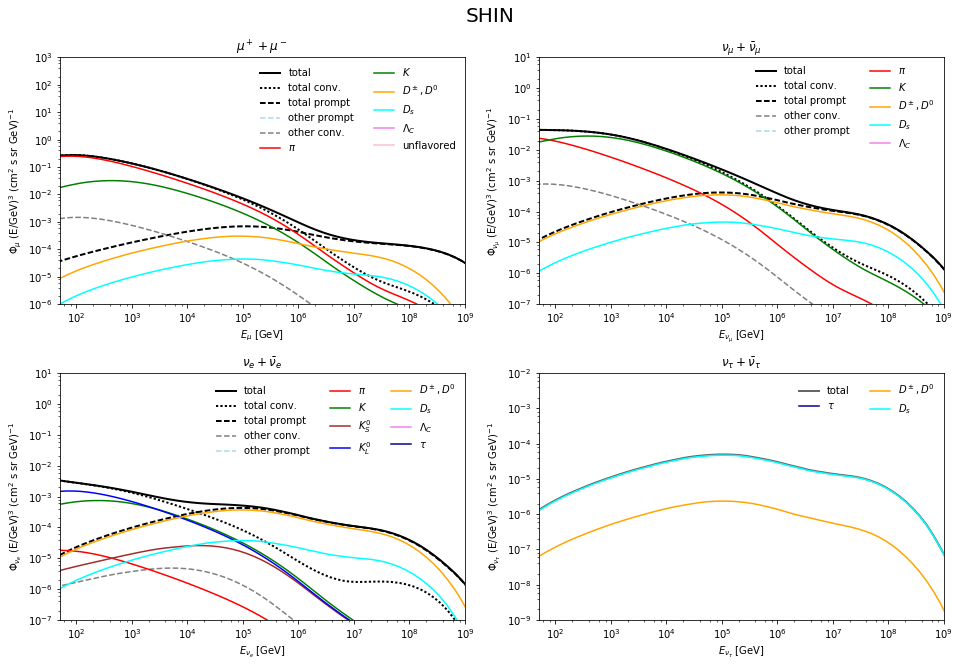

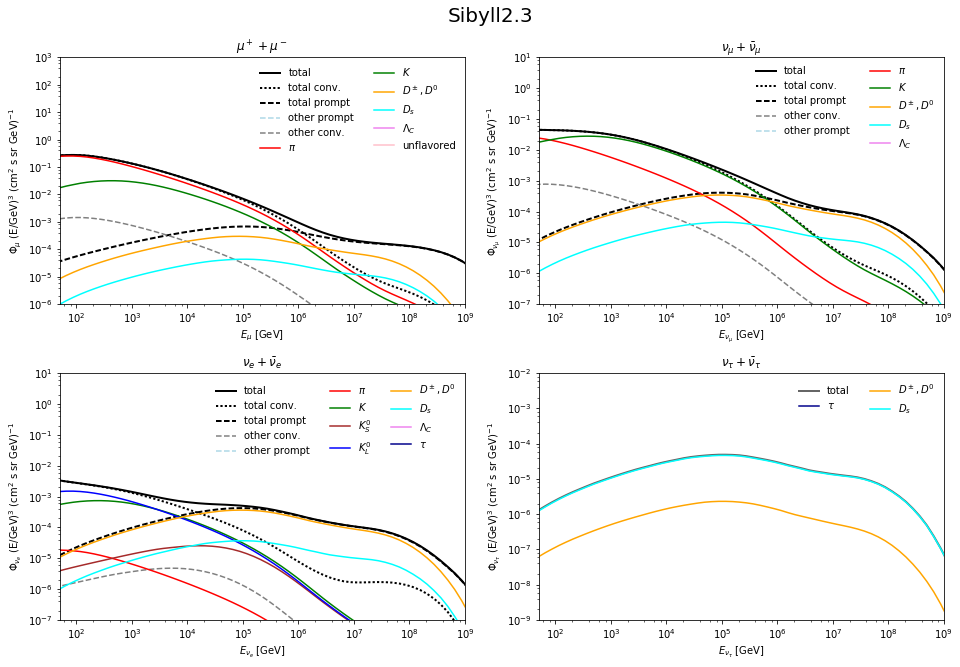

In [5]:
color_spectrum = ['b', 'r', 'g', 'orange', 'cyan', 'violet',
                  'brown', 'pink', 'yellow', 'lightblue']
for key in ['SHIN','Sibyll2.3']:
    fig,ax = plt.subplots(2,2,figsize=(14, 9.5),squeeze=False)
    fig.set_tight_layout(dict(rect=[0.01, 0.01, 0.97, 0.95]))
    fig.suptitle(key,fontsize=20)
    e_grid = mceq_run.e_grid
    
    # muon flux
    ax[0,0].set_title(r'$\mu^+ + \mu^-$')
    ax[0,0].plot(e_grid, mu_total[key], ls='-', lw=2, color='black', label='total')
    ax[0,0].plot(e_grid, mu_conv[key], ls='dotted', lw=2, color='black', label=r'total conv.')
    ax[0,0].plot(e_grid, mu_prompt[key], ls='--', lw=2, color='black', label='total prompt')
    ax[0,0].plot(e_grid, mu_obs[key]['other prompt'], ls='--', lw=1.5, color='lightblue', label=r'other prompt')
    ax[0,0].plot(e_grid, mu_obs[key]['other conv. mu'], ls='--', lw=1.5, color='grey', label=r'other conv.')
    ax[0,0].plot(e_grid, mu_pi[key], ls='-', lw=1.5, color='red', label=r'$\pi$')
    ax[0,0].plot(e_grid, mu_k[key], ls='-', lw=1.5, color='green', label=r'$K$')
    ax[0,0].plot(e_grid, mu_obs[key]['$D^\\pm + D^0$'], ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
    ax[0,0].plot(e_grid, mu_obs[key]['$D_s$'], ls='-', lw=1.5, color='cyan', label=r'$D_s$')
    ax[0,0].plot(e_grid, mu_obs[key]['$\\Lambda_C$'], ls='-', lw=1.5, color='violet', label=r'$\Lambda_C$')
    ax[0,0].plot(e_grid, mu_obs[key]['unflavored'], ls='-', lw=1.5, color='pink', label=r'unflavored')

    ax[0,0].loglog()
    ax[0,0].set_xlabel(r"$E_{\mu}$ [GeV]")
    ax[0,0].set_ylabel(r"$\Phi_{\mu}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
    ax[0,0].set_xlim([50, 1e9])
    ax[0,0].set_ylim([1e-6, 1e3])
    ax[0,0].legend(loc='upper right', frameon=False, numpoints=1, ncol=2)
    
    # muon neutrino flux
    ax[0,1].set_title(r'$\nu_{\mu} + \bar{\nu}_{\mu}$')
    ax[0,1].plot(e_grid, numu_total[key], ls='-', lw=2, color='black', label='total')
    ax[0,1].plot(e_grid, numu_conv[key], ls='dotted', lw=2, color='black', label=r'total conv.')
    ax[0,1].plot(e_grid, numu_prompt[key], ls='--', lw=2, color='black', label='total prompt')
    ax[0,1].plot(e_grid, numu_obs[key]['other conv. numu'], ls='--', lw=1.5, color='grey', label=r'other conv.')
    ax[0,1].plot(e_grid, numu_obs[key]['other prompt'], ls='--', lw=1.5, color='lightblue', label=r'other prompt')
    ax[0,1].plot(e_grid, numu_pi[key], ls='-', lw=1.5, color='red', label=r'$\pi$')
    ax[0,1].plot(e_grid, numu_k[key], ls='-', lw=1.5, color='green', label=r'$K$')
    ax[0,1].plot(e_grid, numu_obs[key]['$D^\\pm + D^0$'], ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
    ax[0,1].plot(e_grid, numu_obs[key]['$D_s$'], ls='-', lw=1.5, color='cyan', label=r'$D_s$')
    ax[0,1].plot(e_grid, numu_obs[key]['$\\Lambda_C$'], ls='-', lw=1.5, color='violet', label=r'$\Lambda_C$')
    ax[0,1].loglog()
    ax[0,1].set_xlabel(r"$E_{\nu_{\mu}}$ [GeV]")
    ax[0,1].set_ylabel(r"$\Phi_{\nu_{\mu}}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
    ax[0,1].set_xlim([50, 1e9])
    ax[0,1].set_ylim([1e-7, 1e1])
    ax[0,1].legend(loc='upper right', frameon=False, numpoints=1, ncol=2)
    
    #electron neutrino flux
    ax[1,0].set_title(r'$\nu_{e} + \bar{\nu}_{e}$')
    ax[1,0].plot(e_grid, nue_total[key], ls='-', lw=2, color='black', label='total')
    ax[1,0].plot(e_grid, nue_conv[key], ls='dotted', lw=2, color='black', label=r'total conv.')
    ax[1,0].plot(e_grid, nue_prompt[key], ls='--', lw=2, color='black', label='total prompt')
    ax[1,0].plot(e_grid, nue_obs[key]['other conv. nue'], ls='--', lw=1.5, color='grey', label=r'other conv.')
    ax[1,0].plot(e_grid, nue_obs[key]['other prompt'], ls='--', lw=1.5, color='lightblue', label=r'other prompt')
    ax[1,0].plot(e_grid, nue_pi[key], ls='-', lw=1.5, color='red', label=r'$\pi$')
    ax[1,0].plot(e_grid, nue_k[key], ls='-', lw=1.5, color='green', label=r'$K$')
    ax[1,0].plot(e_grid, nue_obs[key]['$K^0_s$'], ls='-', lw=1.5, color='brown', label=r'$K^0_S$')
    ax[1,0].plot(e_grid, nue_obs[key]['$K^0_L$'], ls='-', lw=1.5, color='blue', label=r'$K^0_L$')
    # ax[1,0].plot(e_grid, nue_obs[key]['$\\mu$ decay'], ls='-', lw=1.5, color='pink', label=r'$\mu$ decay')
    ax[1,0].plot(e_grid, nue_obs[key]['$D^\\pm + D^0$'], ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
    ax[1,0].plot(e_grid, nue_obs[key]['$D_s$'], ls='-', lw=1.5, color='cyan', label=r'$D_s$')
    ax[1,0].plot(e_grid, nue_obs[key]['$\\Lambda_C$'], ls='-', lw=1.5, color='violet', label=r'$\Lambda_C$')
    ax[1,0].plot(e_grid, nue_obs[key]["tau decay"], ls='-', lw=1.5, color='darkblue', label=r'$\tau$')    
    ax[1,0].loglog()
    ax[1,0].set_xlabel(r"$E_{\nu_{e}}$ [GeV]")
    ax[1,0].set_ylabel(r"$\Phi_{\nu_{e}}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
    ax[1,0].set_xlim([50, 1e9])
    ax[1,0].set_ylim([1e-7, 1e1])
    ax[1,0].legend(loc=1, frameon=False, numpoints=1, ncol=3)
    
    #tau neutrino flux
    ax[1,1].set_title(r'$\nu_{\tau} + \bar{\nu}_{\tau}$')
    ax[1,1].plot(e_grid, nutau_total[key], ls='-', lw=2, color='black', alpha=0.6, label='total')
    ax[1,1].plot(e_grid, nutau_obs[key]["tau decay"], ls='-', lw=1.5, color='darkblue', label=r'$\tau$')
    ax[1,1].plot(e_grid, nutau_obs[key]['$D^\\pm + D^0$'], ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
    ax[1,1].plot(e_grid, nutau_obs[key]['$D_s$'], ls='-', lw=1.5, color='cyan', label=r'$D_s$')
    ax[1,1].loglog()
    ax[1,1].set_xlabel(r"$E_{\nu_{\tau}}$ [GeV]")
    ax[1,1].set_ylabel(r"$\Phi_{\nu_{\tau}}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
    ax[1,1].set_xlim([50, 1e9])
    ax[1,1].set_ylim([1e-9, 1e-2])
    ax[1,1].legend(loc=1, frameon=False, numpoints=1, ncol=2)

    fig.savefig('Detailed_flux_{0:s}.pdf'.format(key))





Plot the flux ratios of both models
---------------------------------

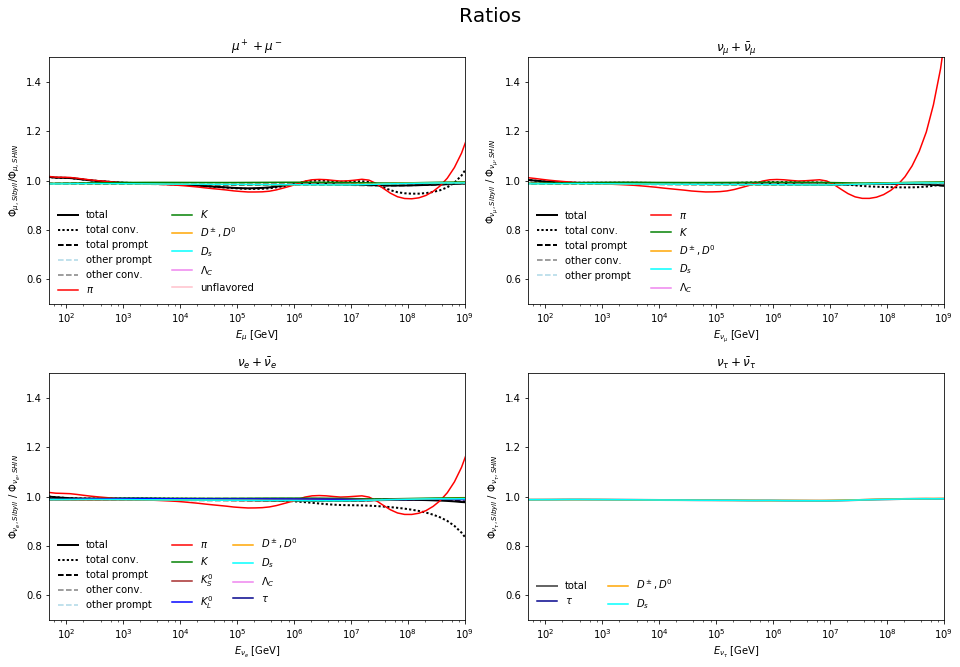

In [6]:
color_spectrum = ['b', 'r', 'g', 'orange', 'cyan', 'violet',
                  'brown', 'pink', 'yellow', 'lightblue']

fig,ax = plt.subplots(2,2,figsize=(14, 9.5),squeeze=False)
fig.set_tight_layout(dict(rect=[0.01, 0.01, 0.97, 0.95]))
fig.suptitle('Ratios',fontsize=20)
e_grid = mceq_run.e_grid
    
key0,key1 = 'Sibyll2.3', 'SHIN'

# muon flux
ax[0,0].set_title(r'$\mu^+ + \mu^-$')
ax[0,0].plot(e_grid, mu_total[key0]/mu_total[key1], ls='-', lw=2, color='black', label='total')
ax[0,0].plot(e_grid, mu_conv[key0]/mu_conv[key1], ls='dotted', lw=2, color='black', label=r'total conv.')
ax[0,0].plot(e_grid, mu_prompt[key0]/mu_prompt[key1], ls='--', lw=2, color='black', label='total prompt')
ax[0,0].plot(e_grid, mu_obs[key0]['other prompt'] / mu_obs[key1]['other prompt'], 
             ls='--', lw=1.5, color='lightblue', label=r'other prompt')
ax[0,0].plot(e_grid, mu_obs[key0]['other conv. mu']/mu_obs[key1]['other conv. mu'], 
             ls='--', lw=1.5, color='grey', label=r'other conv.')
ax[0,0].plot(e_grid, mu_pi[key0]/mu_pi[key1], ls='-', lw=1.5, color='red', label=r'$\pi$')
ax[0,0].plot(e_grid, mu_k[key0]/mu_k[key1], ls='-', lw=1.5, color='green', label=r'$K$')
ax[0,0].plot(e_grid, mu_obs[key0]['$D^\\pm + D^0$'] / mu_obs[key1]['$D^\\pm + D^0$'], 
             ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
ax[0,0].plot(e_grid, mu_obs[key0]['$D_s$'] / mu_obs[key1]['$D_s$'],
             ls='-', lw=1.5, color='cyan', label=r'$D_s$')
ax[0,0].plot(e_grid, mu_obs[key0]['$\\Lambda_C$'] / mu_obs[key1]['$\\Lambda_C$'],
             ls='-', lw=1.5, color='violet', label=r'$\Lambda_C$')
ax[0,0].plot(e_grid, mu_obs[key0]['unflavored'] / mu_obs[key1]['unflavored'], 
             ls='-', lw=1.5, color='pink', label=r'unflavored')

ax[0,0].set_xscale('log')
ax[0,0].set_xlabel(r"$E_{\mu}$ [GeV]")
ax[0,0].set_ylabel(r"$\Phi_{\mu ,Sibyll}$/$\Phi_{\mu ,SHIN}$")
ax[0,0].set_xlim([50, 1e9])
ax[0,0].set_ylim([0.5, 1.5])
ax[0,0].legend(loc='best', frameon=False, numpoints=1, ncol=2)


# muon neutrino flux
ax[0,1].set_title(r'$\nu_{\mu} + \bar{\nu}_{\mu}$')
ax[0,1].plot(e_grid, numu_total[key0]/numu_total[key1], ls='-', lw=2, color='black', label='total')
ax[0,1].plot(e_grid, numu_conv[key0]/numu_conv[key1], ls='dotted', lw=2, color='black', label=r'total conv.')
ax[0,1].plot(e_grid, numu_prompt[key0]/numu_prompt[key1], ls='--', lw=2, color='black', label='total prompt')
ax[0,1].plot(e_grid, numu_obs[key0]['other conv. numu']/numu_obs[key1]['other conv. numu'], 
             ls='--', lw=1.5, color='grey', label=r'other conv.')
ax[0,1].plot(e_grid, numu_obs[key0]['other prompt']/numu_obs[key1]['other prompt'],
             ls='--', lw=1.5, color='lightblue', label=r'other prompt')
ax[0,1].plot(e_grid, numu_pi[key0]/numu_pi[key1], ls='-', lw=1.5, color='red', label=r'$\pi$')
ax[0,1].plot(e_grid, numu_k[key0]/numu_k[key1], ls='-', lw=1.5, color='green', label=r'$K$')
ax[0,1].plot(e_grid, numu_obs[key0]['$D^\\pm + D^0$']/numu_obs[key1]['$D^\\pm + D^0$'], 
             ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
ax[0,1].plot(e_grid, numu_obs[key0]['$D_s$'] /numu_obs[key1]['$D_s$'], 
             ls='-', lw=1.5, color='cyan', label=r'$D_s$')
ax[0,1].plot(e_grid, numu_obs[key0]['$\\Lambda_C$'] /numu_obs[key1]['$\\Lambda_C$'],
             ls='-', lw=1.5, color='violet', label=r'$\Lambda_C$')
ax[0,1].set_xscale('log')
ax[0,1].set_xlabel(r"$E_{\nu_{\mu}}$ [GeV]")
ax[0,1].set_ylabel(r"$\Phi_{\nu_{\mu}, Sibyll}$ / $\Phi_{\nu_{\mu}, SHIN}$ ")
ax[0,1].set_xlim([50, 1e9])
ax[0,1].set_ylim([0.5, 1.5])
ax[0,1].legend(loc='best', frameon=False, numpoints=1, ncol=2)
    

#electron neutrino flux
ax[1,0].set_title(r'$\nu_{e} + \bar{\nu}_{e}$')
ax[1,0].plot(e_grid, nue_total[key0] /nue_total[key1], ls='-', lw=2, color='black', label='total')
ax[1,0].plot(e_grid, nue_conv[key0] / nue_conv[key1], ls='dotted', lw=2, color='black', label=r'total conv.')
ax[1,0].plot(e_grid, nue_prompt[key0] /nue_prompt[key1], ls='--', lw=2, color='black', label='total prompt')
ax[1,0].plot(e_grid, nue_obs[key0]['other conv. nue']/nue_obs[key1]['other conv. nue'], 
             ls='--', lw=1.5, color='grey', label=r'other conv.')
ax[1,0].plot(e_grid, nue_obs[key0]['other prompt']/nue_obs[key1]['other prompt'],
             ls='--', lw=1.5, color='lightblue', label=r'other prompt')
ax[1,0].plot(e_grid, nue_pi[key0]/nue_pi[key1], ls='-', lw=1.5, color='red', label=r'$\pi$')
ax[1,0].plot(e_grid, nue_k[key0]/nue_k[key1], ls='-', lw=1.5, color='green', label=r'$K$')
ax[1,0].plot(e_grid, nue_obs[key0]['$K^0_s$']/nue_obs[key1]['$K^0_s$'], 
             ls='-', lw=1.5, color='brown', label=r'$K^0_S$')
ax[1,0].plot(e_grid, nue_obs[key0]['$K^0_L$']/nue_obs[key1]['$K^0_L$'],
             ls='-', lw=1.5, color='blue', label=r'$K^0_L$')
# ax[1,0].plot(e_grid, nue_obs[key]['$\\mu$ decay'], ls='-', lw=1.5, color='pink', label=r'$\mu$ decay')
ax[1,0].plot(e_grid, nue_obs[key0]['$D^\\pm + D^0$'] / nue_obs[key1]['$D^\\pm + D^0$'],
             ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
ax[1,0].plot(e_grid, nue_obs[key0]['$D_s$']/nue_obs[key1]['$D_s$'],
             ls='-', lw=1.5, color='cyan', label=r'$D_s$')
ax[1,0].plot(e_grid, nue_obs[key0]['$\\Lambda_C$'] /nue_obs[key1]['$\\Lambda_C$'], 
             ls='-', lw=1.5, color='violet', label=r'$\Lambda_C$')
ax[1,0].plot(e_grid, nue_obs[key0]["tau decay"]/nue_obs[key1]["tau decay"],
             ls='-', lw=1.5, color='darkblue', label=r'$\tau$')    
ax[1,0].set_xscale('log')
ax[1,0].set_xlabel(r"$E_{\nu_{e}}$ [GeV]")
ax[1,0].set_ylabel(r"$\Phi_{\nu_{e},Sibyll}$ / $\Phi_{\nu_{e},SHIN}$ ")
ax[1,0].set_xlim([50, 1e9])
ax[1,0].set_ylim([0.5, 1.5])
ax[1,0].legend(loc='best', frameon=False, numpoints=1, ncol=3)
    
    
#tau neutrino flux
ax[1,1].set_title(r'$\nu_{\tau} + \bar{\nu}_{\tau}$')
ax[1,1].plot(e_grid, nutau_total[key0] /nutau_total[key1], ls='-', lw=2, color='black', alpha=0.6, label='total')
ax[1,1].plot(e_grid, nutau_obs[key0]["tau decay"]/nutau_obs[key1]["tau decay"],
             ls='-', lw=1.5, color='darkblue', label=r'$\tau$')
ax[1,1].plot(e_grid, nutau_obs[key0]['$D^\\pm + D^0$']/nutau_obs[key1]['$D^\\pm + D^0$'],
             ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
ax[1,1].plot(e_grid, nutau_obs[key0]['$D_s$']/nutau_obs[key1]['$D_s$'], 
             ls='-', lw=1.5, color='cyan', label=r'$D_s$')
ax[1,1].set_xscale('log')
ax[1,1].set_xlabel(r"$E_{\nu_{\tau}}$ [GeV]")
ax[1,1].set_ylabel(r"$\Phi_{\nu_{\tau},Sibyll}$ / $\Phi_{\nu_{\tau},SHIN}$ ")
ax[1,1].set_xlim([50, 1e9])
ax[1,1].set_ylim([0.5, 1.5])
ax[1,1].legend(loc='best', frameon=False, numpoints=1, ncol=2)

fig.savefig('Detailed_FluxRatios_{0:s}.pdf'.format(key))

